<a href="https://colab.research.google.com/github/lbagnus/Data_ViraPosts/blob/main/cienciaDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving Cleaned_Viral_Social_Media_Trends.csv to Cleaned_Viral_Social_Media_Trends.csv


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Cleaned_Viral_Social_Media_Trends.csv")
df.head()

,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022-01-13,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022-05-13,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022-01-07,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022-12-05,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,2023-03-23,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Cleaned_Viral_Social_Media_Trends.csv")
df.info()
df.describe()
df.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Post_Date         5000 non-null   object
 2   Platform          5000 non-null   object
 3   Hashtag           5000 non-null   object
 4   Content_Type      5000 non-null   object
 5   Region            5000 non-null   object
 6   Views             5000 non-null   int64 
 7   Likes             5000 non-null   int64 
 8   Shares            5000 non-null   int64 
 9   Comments          5000 non-null   int64 
 10  Engagement_Level  5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


,Post_ID,Post_Date,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,2022-01-13,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,2022-05-13,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,2022-01-07,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,2022-12-05,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,2023-03-23,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [ ]:
import pandas as pd
import numpy as np

# Convertir fecha a datetime y extraer hora y día si lo necesitás
df["Post_Date"] = pd.to_datetime(df["Post_Date"])
df["Month"] = df["Post_Date"].dt.month
df["Day"] = df["Post_Date"].dt.day
df["Weekday"] = df["Post_Date"].dt.day_name()

# Definimos "viral" si tiene más de 300k likes y 1M de views
df["Viral"] = np.where((df["Likes"] > 300000) | (df["Views"] > 10000000), 1, 0)


# Longitud del hashtag como proxy simple del texto
df["Hashtag_Length"] = df["Hashtag"].apply(lambda x: len(str(x)))

# Revisión de engagement
df["Engagement_Level"] = df["Engagement_Level"].astype("category")

# Ver nulos (no hay, pero por las dudas)
print(df.isnull().sum())

#Reasignando "Shorts" por "Reel"
df.loc[df["Platform"] == "Instagram", "Content_Type"] = df.loc[df["Platform"] == "Instagram", "Content_Type"].replace("Shorts", "Reel")
df.loc[df["Platform"] == "Instagram", "Content_Type"] = df.loc[df["Platform"] == "Instagram", "Content_Type"].replace("Tweet", "Story")



0       9
1       9
2       9
3       9
4       5
       ..
4995    9
4996    9
4997    7
4998    6
4999    7
Name: Hashtag_Length, Length: 5000, dtype: int64


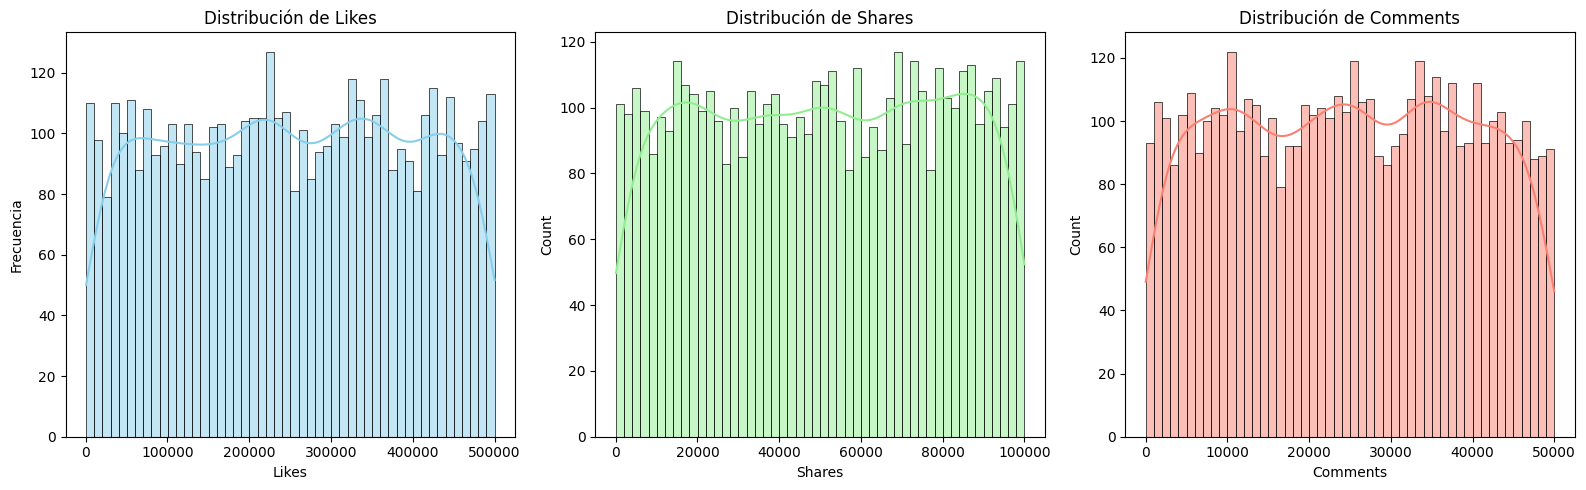

In [ ]:
# Ver distribución de likes
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general
plt.figure(figsize=(16,5))

# Likes
plt.subplot(1,3,1)
sns.histplot(df["Likes"], bins=50, kde=True, color='skyblue')
plt.title("Distribución de Likes")
plt.xlabel("Likes")
plt.ylabel("Frecuencia")

# Shares
plt.subplot(1,3,2)
sns.histplot(df["Shares"], bins=50, kde=True, color='lightgreen')
plt.title("Distribución de Shares")
plt.xlabel("Shares")

# Comments
plt.subplot(1,3,3)
sns.histplot(df["Comments"], bins=50, kde=True, color='salmon')
plt.title("Distribución de Comments")
plt.xlabel("Comments")

plt.tight_layout()
plt.show()


<ipython-input-9-716330264>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Content_Type', order=df['Content_Type'].value_counts().index, palette='pastel')


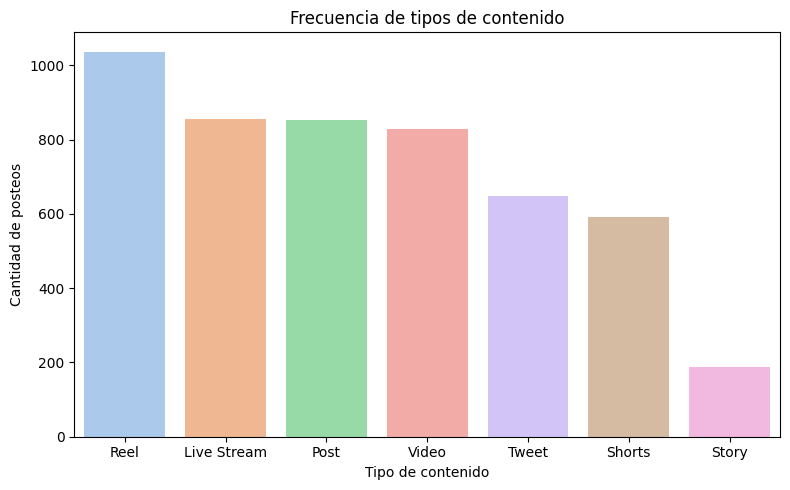

In [ ]:
#¿Qué tipo de posteo se publica más?
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de tipos de contenido
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Content_Type', order=df['Content_Type'].value_counts().index, palette='pastel')
plt.title("Frecuencia de tipos de contenido")
plt.xlabel("Tipo de contenido")
plt.ylabel("Cantidad de posteos")
plt.tight_layout()
plt.show()



                 Likes  Comments   Shares      Views
Content_Type                                        
Reel          255011.0   25223.0  51358.0  2533269.0
Video         254769.0   24695.0  50614.0  2489009.0
Post          252784.0   24555.0  50164.0  2474337.0
Tweet         249384.0   24636.0  51427.0  2500387.0
Live Stream   248812.0   25168.0  49922.0  2481009.0
Shorts        247926.0   25060.0  49594.0  2486351.0


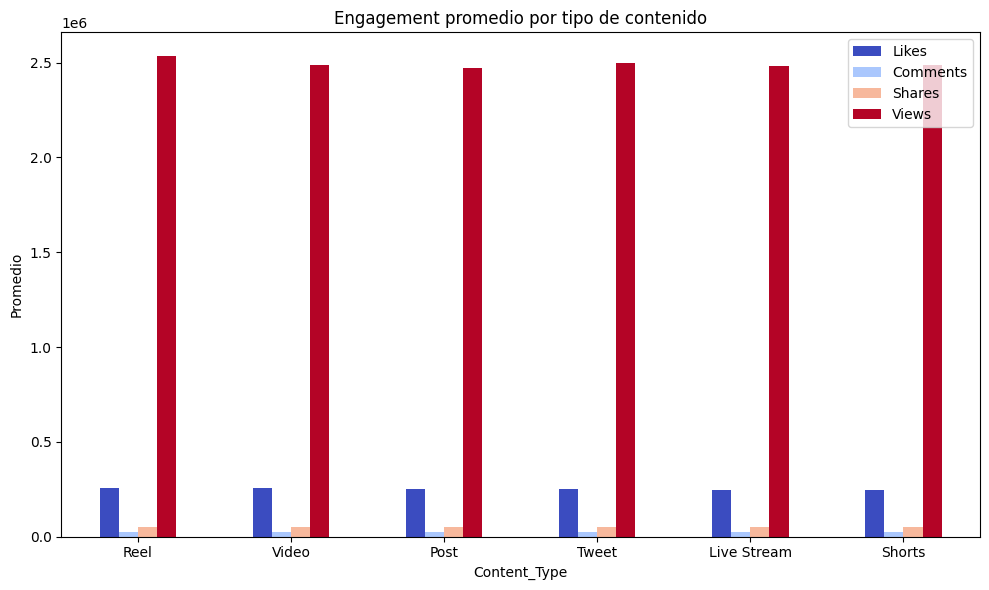

In [ ]:
#¿Qué tipo de contenido tiene más likes, comments, vistas y shares?
# Promedios por tipo
engagement_by_type = df.groupby('Content_Type')[['Likes', 'Comments', 'Shares', 'Views']].mean().round(0).sort_values(by='Likes', ascending=False)
print(engagement_by_type)

# Gráfico
engagement_by_type.plot(kind='bar', figsize=(10,6), colormap='coolwarm')
plt.title("Engagement promedio por tipo de contenido")
plt.ylabel("Promedio")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-46-3843183215>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=viral_by_platform.values, y=viral_by_platform.index, palette="flare")


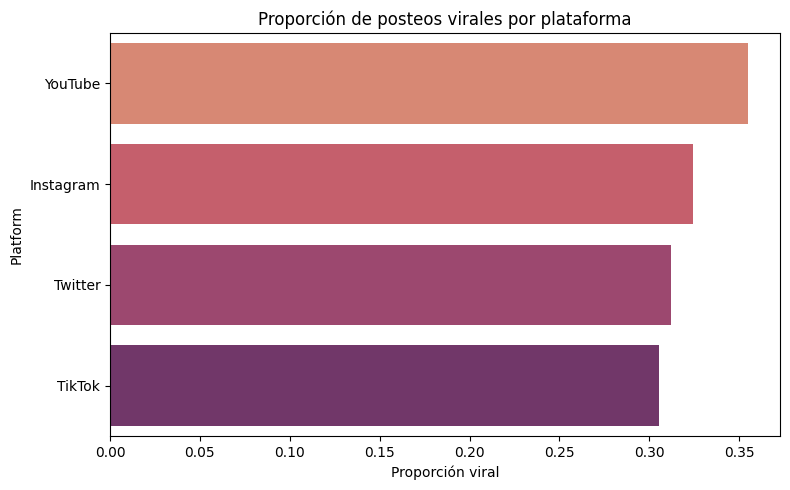

In [ ]:
#¿En qué plataforma se vuelve más viral?
# Proporción viral por plataforma
viral_by_platform = df.groupby("Platform")["Viral"].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=viral_by_platform.values, y=viral_by_platform.index, palette="flare")
plt.title("Proporción de posteos virales por plataforma")
plt.xlabel("Proporción viral")
plt.tight_layout()
plt.show()


<ipython-input-42-3588734493>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="viridis")


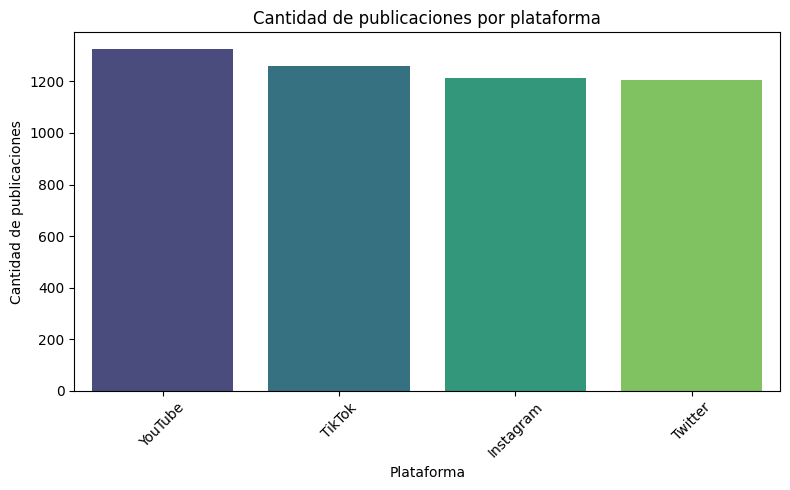

In [ ]:
#Cantidad de publicaciones por plataforma por año
import seaborn as sns
import matplotlib.pyplot as plt

# Contar cantidad de publicaciones por plataforma
platform_counts = df["Platform"].value_counts().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette="viridis")
plt.title("Cantidad de publicaciones por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Cantidad de publicaciones")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



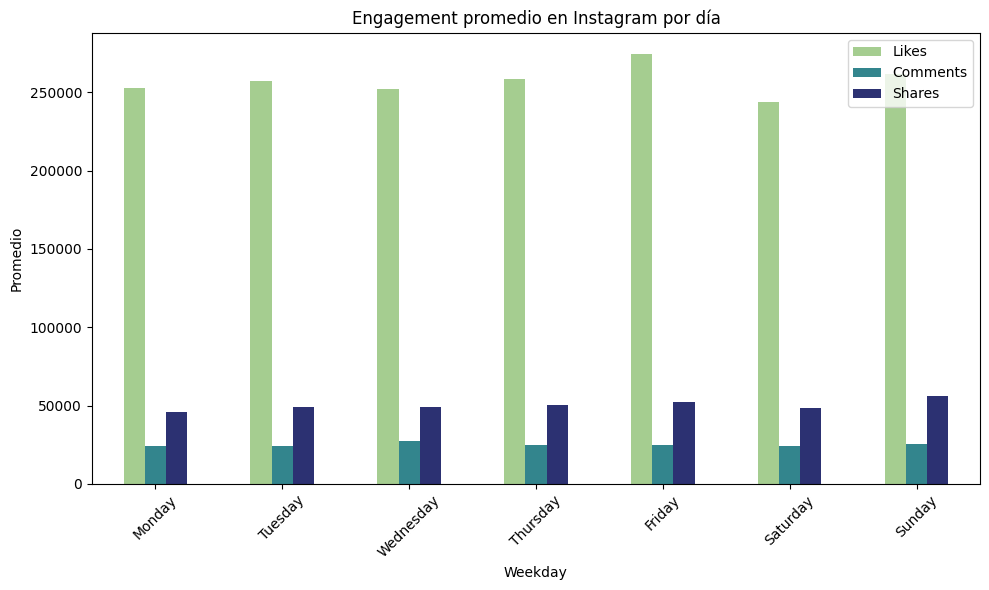

In [ ]:
# En Instagram, ¿qué días hay más likes, comments y shares?
ig = df[df["Platform"] == "Instagram"]

# Agrupar por día
ig_by_day = ig.groupby("Weekday")[["Likes", "Comments", "Shares"]].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Gráfico
ig_by_day.plot(kind='bar', figsize=(10,6), colormap='crest')
plt.title("Engagement promedio en Instagram por día")
plt.ylabel("Promedio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



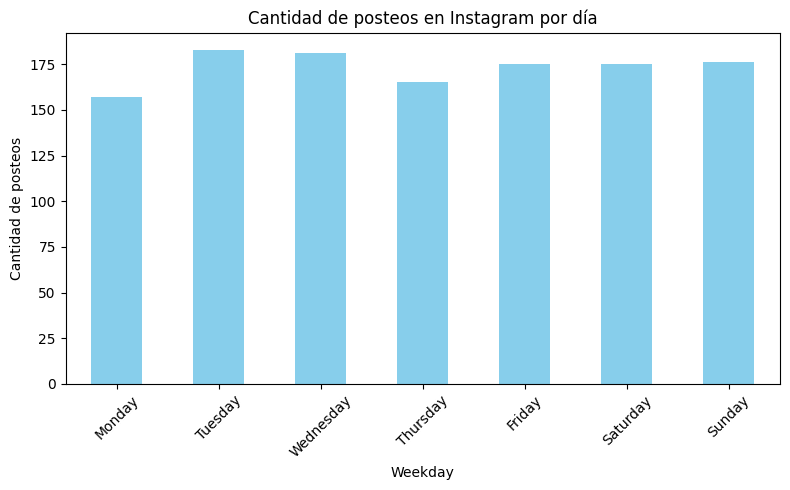

In [ ]:
#¿Qué día de la semana se publica más?
import matplotlib.pyplot as plt

ig = df[df["Platform"] == "Instagram"].copy()
ig["Weekday"] = ig["Post_Date"].dt.day_name()
posts_by_day = ig["Weekday"].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
posts_by_day.plot(kind="bar", figsize=(8, 5), color="skyblue")
plt.title("Cantidad de posteos en Instagram por día")
plt.ylabel("Cantidad de posteos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#¿Qué hashtags hay en los posteos con más engagement?
import matplotlib.pyplot as plt

# Top 20 hashtags por promedio de likes
top_hashtags = df.groupby("Hashtag")[["Likes", "Comments", "Shares", "Views"]].mean().sort_values(by="Likes", ascending=False).head(20)
print(top_hashtags)


                    Likes      Comments        Shares         Views
Hashtag                                                            
#Education  260423.419048  24684.923810  51748.704762  2.531228e+06
#Tech       260347.148676  25799.549898  48287.209776  2.516381e+06
#Dance      254484.889113  24565.044355  49557.957661  2.447363e+06
#Comedy     253615.746535  24798.885149  49418.049505  2.450142e+06
#Fitness    253130.125000  24532.694030  51183.119403  2.599391e+06
#Fashion    249970.577002  24206.324435  50956.944559  2.426831e+06
#Viral      249964.492723  24776.513514  50428.889813  2.437590e+06
#Music      248012.815416  25024.496957  50965.628803  2.568759e+06
#Gaming     242819.588727  25332.237996  51360.818372  2.500699e+06
#Challenge  241212.439842  25207.850099  51182.428008  2.451335e+06


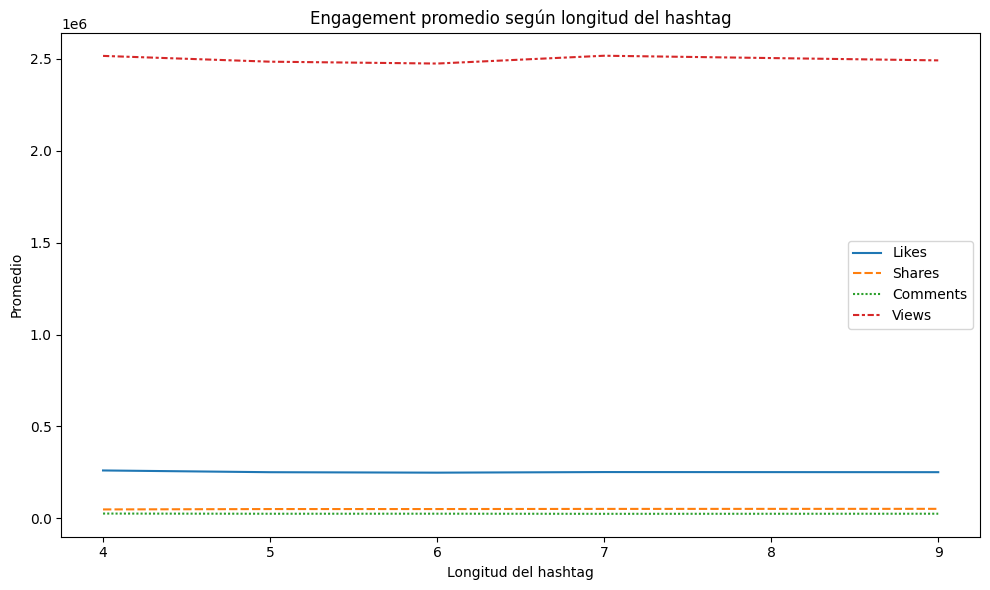

In [ ]:
#6. ¿Qué longitud tienen los hashtags más efectivos?
import matplotlib.pyplot as plt

df_ig = df[df["Platform"] == "Instagram"]

# Promedio de likes según largo del hashtag
length_engagement = df.groupby("Hashtag_Length")[["Likes", "Shares", "Comments","Views"]].mean().round(0)

plt.figure(figsize=(10,6))
sns.lineplot(data=length_engagement)
plt.title("Engagement promedio según longitud del hashtag")
plt.xlabel("Longitud del hashtag")
plt.ylabel("Promedio")
plt.tight_layout()
plt.show()


                 Likes  Comments   Shares
Content_Type                             
Live Stream   278308.0   25604.0  51439.0
Video         261794.0   24473.0  48365.0
Tweet         252876.0   25731.0  49404.0
Post          252381.0   23708.0  49592.0
Shorts        250927.0   25506.0  49229.0
Reel          245219.0   24737.0  53555.0


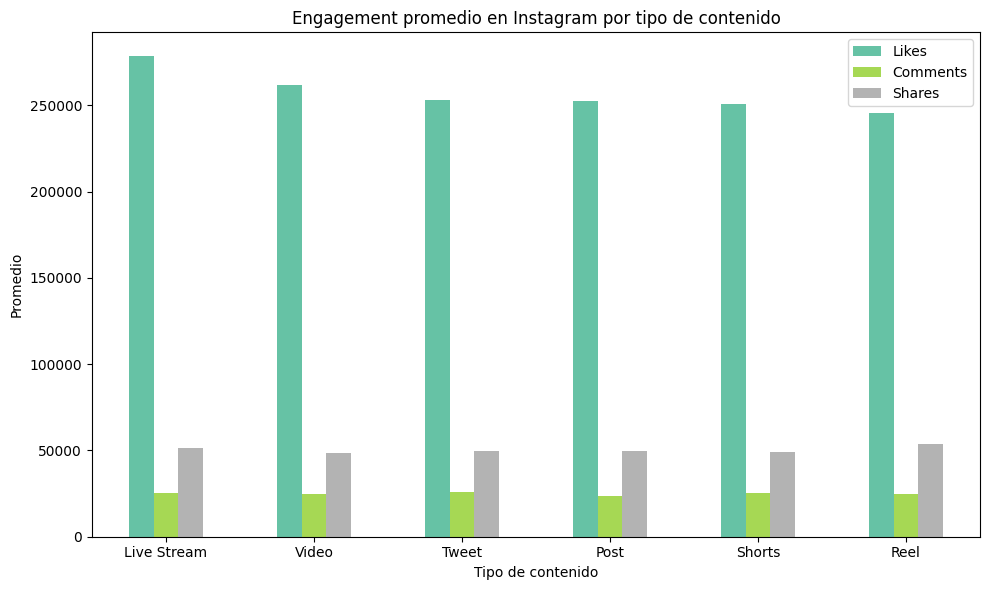

In [ ]:
#Engagement por tipo de contenido en Instagram
import matplotlib.pyplot as plt

# Filtrar Instagram
ig = df[df["Platform"] == "Instagram"]

# Agrupar por tipo de contenido
ig_engagement = ig.groupby("Content_Type")[["Likes", "Comments", "Shares"]].mean().round(0).sort_values(by="Likes", ascending=False)
print(ig_engagement)

# Visualización
ig_engagement.plot(kind="bar", figsize=(10,6), colormap="Set2")
plt.title("Engagement promedio en Instagram por tipo de contenido")
plt.ylabel("Promedio")
plt.xlabel("Tipo de contenido")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


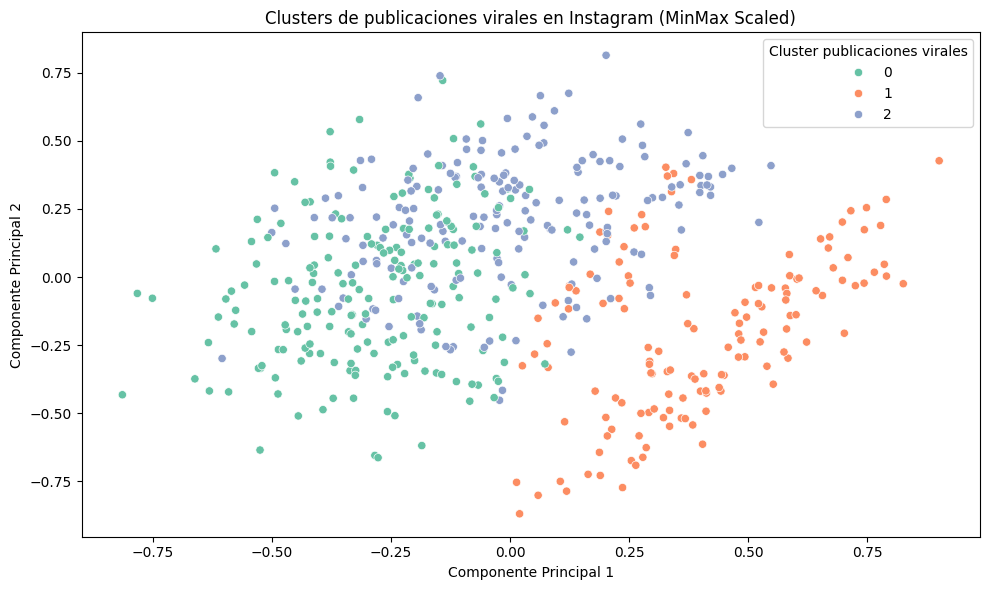

In [67]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Filtrar: solo posteos virales en Instagram
df_viral_ig = df[(df['Platform'] == 'Instagram') & (df['Viral'] == 1)].copy()

# Calcular longitud promedio de los hashtags
df_viral_ig['Avg_Hashtag_Length'] = df_viral_ig['Hashtag'].apply(
    lambda x: np.mean([len(tag.strip()) for tag in str(x).split(',')]) if pd.notnull(x) and x != '' else 0
)

# Extraer el día de la semana
df_viral_ig['Weekday'] = df_viral_ig['Post_Date'].dt.day_name()

# Variables para clustering
features = ["Views", "Likes", "Comments", "Shares", "Avg_Hashtag_Length"]
X = df_viral_ig[features].copy()

# Escalar con MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df_viral_ig['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA para reducir a 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_viral_ig['PCA1'] = X_pca[:, 0]
df_viral_ig['PCA2'] = X_pca[:, 1]

# Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_viral_ig,
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='Set2'
)
plt.title("Clusters de publicaciones virales en Instagram (MinMax Scaled)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title='Cluster publicaciones virales')
plt.tight_layout()
plt.show()



In [68]:
# Análisis descriptivo por cluster

# Ver cantidad de publicaciones por cluster
cluster_counts = df_viral_ig['Cluster'].value_counts().sort_index()
print("Cantidad de publicaciones por cluster:")
print(cluster_counts)

# Calcular medias de las variables dentro de cada cluster
cluster_means = df_viral_ig.groupby('Cluster')[["Views", "Likes", "Comments", "Shares", "Avg_Hashtag_Length"]].mean()
print("\nPromedios por cluster:")
print(cluster_means)

# Estadísticas adicionales por cluster (opcional)
cluster_stats = df_viral_ig.groupby('Cluster')[["Views", "Likes", "Comments", "Shares", "Avg_Hashtag_Length"]].describe()
print("\nEstadísticas completas por cluster:")
print(cluster_stats)


Cantidad de publicaciones por cluster:
Cluster
0    192
1    139
2    184
Name: count, dtype: int64

Promedios por cluster:
                Views          Likes      Comments        Shares  \
Cluster                                                            
0        2.771238e+06  445279.364583  23023.541667  40059.703125   
1        2.176806e+06  403578.417266  23500.258993  57565.366906   
2        2.100145e+06  349457.788043  28485.315217  56272.994565   

         Avg_Hashtag_Length  
Cluster                      
0                  6.354167  
1                  9.553957  
2                  6.581522  

Estadísticas completas por cluster:
         Views                                                              \
         count          mean           std      min         25%        50%   
Cluster                                                                      
0        192.0  2.771238e+06  1.465528e+06  13578.0  1566096.00  2909311.0   
1        139.0  2.176806e+06  1.5156

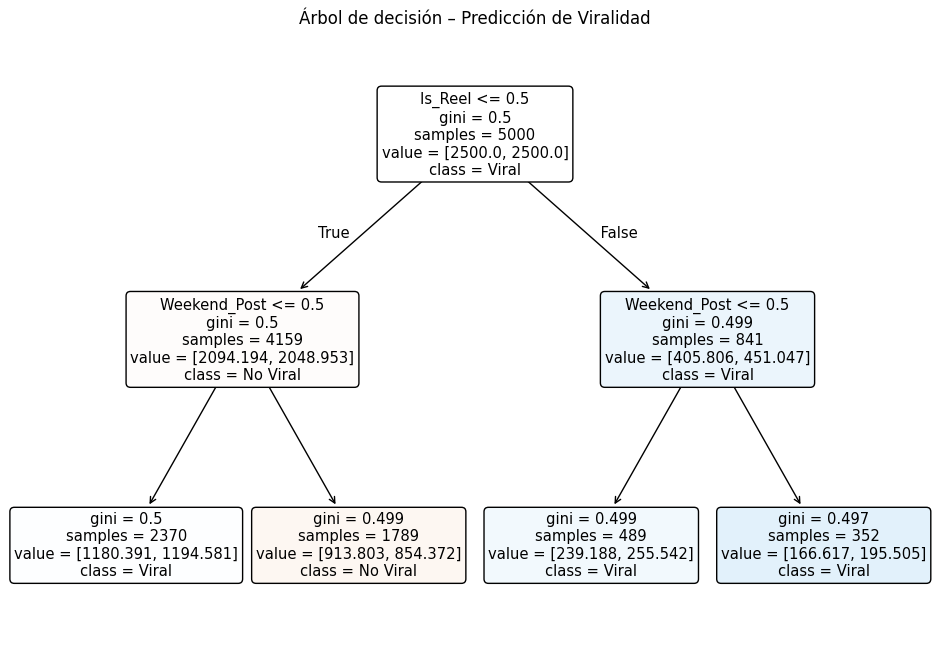

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_csv("Cleaned_Viral_Social_Media_Trends.csv")
df['Post_Date'] = pd.to_datetime(df['Post_Date'])

# columna Weekday (nombre del día de la semana)
df['Weekday'] = df['Post_Date'].dt.day_name()


# Paso 1: variable objetivo
df['Viral'] = np.where((df['Likes'] > 300000) & (df['Views'] > 1000000), 1, 0)

# Paso 2: ¿Es Reel?
df['Is_Reel'] = np.where(df['Content_Type'].str.lower() == 'reel', 1, 0)

# Paso 3: Longitud del hashtag
df['Hashtag_Length'] = df['Hashtag'].str.replace('#','').str.len()
df['Short_Hashtag'] = np.where(df['Hashtag_Length'] < 10, 1, 0)

# Paso 4: ¿Es fin de semana?
df['Weekend_Post'] = np.where(df['Weekday'].isin(['Friday', 'Saturday', 'Sunday']), 1, 0)

# Paso 5: Features y target
X = df[['Is_Reel', 'Short_Hashtag', 'Weekend_Post']]
y = df['Viral']

# Paso 6: arbol con ajustes para dataset desbalanceado
clf = DecisionTreeClassifier(
    max_depth=3,
    class_weight='balanced',  # compensa
    min_samples_leaf=10,
    random_state=42
)
clf.fit(X, y)

# Paso 7: visualizacion
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=['Is_Reel', 'Short_Hashtag', 'Weekend_Post'],
    class_names=['No Viral', 'Viral'],
    filled=True,
    rounded=True
)
plt.title("Árbol de decisión – Predicción de Viralidad")
plt.show()
